In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd

data = pd.read_csv('/gdrive/MyDrive/nor_constant_c.csv')

X = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열
y = data.iloc[:, -1]   # 마지막 열

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_selected = SVC(kernel='rbf')
model_selected.fit(X_train, y_train)

scores = cross_val_score(model_selected, X_train, y_train, cv=5)
print("1. Whole Features")
print("Cross Validation Score :", scores.mean())

1. Whole Features
Cross Validation Score :  0.3097744360902256


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# feature별 중요도
importance = perm_importance.importances_mean

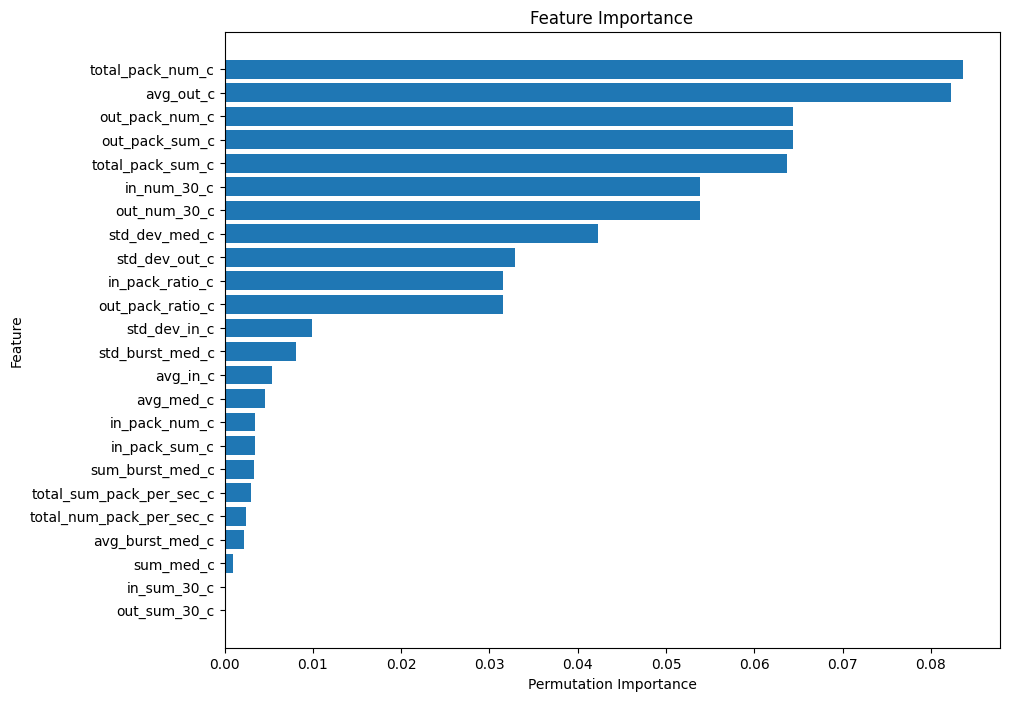

In [5]:
import matplotlib.pyplot as plt

# feature 이름과 중요도를 매핑
feature_importance = dict(zip(X.columns, importance))

# 중요도에 따라 feature 정렬
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# 시각화를 위한 데이터 준비
features, importances = zip(*sorted_importance)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 가장 중요한 feature가 위로 오도록
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

important_features_indices = np.where(perm_importance.importances_mean >= 0.05)[0]

X_important = X.iloc[:, important_features_indices]

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X_important, y, cv=5)

print("2. Importance over 0.05 Features")
print("Cross Validation Score :", np.mean(cv_scores))

2. Importance over 0 Features
Average CV Score: 0.22799999999999998


In [9]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

important_features_indices = np.where(perm_importance.importances_mean >= 0.03)[0]

X_important = X.iloc[:, important_features_indices]

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X_important, y, cv=5)

print("3. Importance over 0.03 Features")
print("Cross Validation Score :", np.mean(cv_scores))

3. Importance over 0.03 Features
Cross Validation Score : 0.2864210526315789
